<a href="https://colab.research.google.com/github/sachinkun21/IOT_Analytics/blob/master/Traffic_Analysis_IoT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will combine multiple datasoures with different time intervals. We will then analyze the data to detect correlations, outliers and trend

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

!ls /gdrive/'My Drive'/DataScience/IoT

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive
environment.json  traffic_heavy_vehicles.json  traffic_light_vehicles.json


In [0]:
import pandas as pd
import numpy as np

In [12]:
environment_df = pd.read_json('/gdrive/My Drive/DataScience/IoT/environment.json')
environment_df.set_index('timestamp' , inplace=True)
environment_df = environment_df.resample('10min').max()


traffic_heavy_vehicles_df = pd.read_json('/gdrive/My Drive/DataScience/IoT/traffic_heavy_vehicles.json')
traffic_heavy_vehicles_df.set_index('timestamp' , inplace=True)
traffic_heavy_vehicles_df.columns = ['heavy_vehicles']
traffic_heavy_vehicles_df = traffic_heavy_vehicles_df.resample('1h').sum()


traffic_light_vehicles_df = pd.read_json('/gdrive/My Drive/DataScience/IoT/traffic_light_vehicles.json')
traffic_light_vehicles_df.set_index('timestamp' , inplace=True)
traffic_light_vehicles_df.columns = ['light_vehicles']
traffic_light_vehicles_df = traffic_light_vehicles_df.resample('1h').sum()

print(traffic_light_vehicles_df.head())
print(traffic_heavy_vehicles_df.head())
print(environment_df.head())

                     light_vehicles
timestamp                          
2018-09-01 00:00:00               0
2018-09-01 01:00:00               0
2018-09-01 02:00:00              17
2018-09-01 03:00:00              45
2018-09-01 04:00:00              81
                     heavy_vehicles
timestamp                          
2018-09-01 00:00:00               0
2018-09-01 01:00:00               0
2018-09-01 02:00:00               0
2018-09-01 03:00:00               1
2018-09-01 04:00:00               5
                     precipitation  humidity  ...  pressure  temperature
timestamp                                     ...                       
2018-09-01 00:00:00            0.1      95.6  ...    1016.3         16.1
2018-09-01 00:10:00            0.0      95.5  ...    1016.4         16.1
2018-09-01 00:20:00            0.0      95.2  ...    1016.5         16.1
2018-09-01 00:30:00            0.0      95.1  ...    1016.4         16.1
2018-09-01 00:40:00            0.0      95.3  ...    1016.

In [13]:
df_conc = pd.concat([environment_df, traffic_light_vehicles_df, traffic_heavy_vehicles_df] , axis = 1)
df_conc.head()

,precipitation,humidity,radiation,sunshine,pressure,temperature,light_vehicles,heavy_vehicles
timestamp,,,,,,,,
2018-09-01 00:00:00,0.1,95.6,0.0,599.2,1016.3,16.1,0.0,0.0
2018-09-01 00:10:00,0.0,95.5,0.0,600.0,1016.4,16.1,NaN,NaN
2018-09-01 00:20:00,0.0,95.2,0.0,598.9,1016.5,16.1,NaN,NaN
2018-09-01 00:30:00,0.0,95.1,0.0,600.0,1016.4,16.1,NaN,NaN
2018-09-01 00:40:00,0.0,95.3,0.0,600.0,1016.3,16.1,NaN,NaN


In [14]:



# Create agg logic
agg_dict = {"temperature": "max", "humidity": "max", "sunshine": "sum", 
            "light_vehicles": "sum", "heavy_vehicles": "sum",
            }

# Resample the dataframe 
environ_traffic_resampled = df_conc.resample("1h").agg(agg_dict)
print(environ_traffic_resampled.head())

                     temperature  humidity  ...  light_vehicles  heavy_vehicles
timestamp                                   ...                                
2018-09-01 00:00:00         16.1      95.6  ...             0.0             0.0
2018-09-01 01:00:00         16.0      95.0  ...             0.0             0.0
2018-09-01 02:00:00         15.9      95.2  ...            17.0             0.0
2018-09-01 03:00:00         15.6      94.8  ...            45.0             1.0
2018-09-01 04:00:00         14.4      93.5  ...            81.0             5.0

[5 rows x 5 columns]


In [15]:
environ_traffic_resampled.corr()

,temperature,humidity,sunshine,light_vehicles,heavy_vehicles
temperature,1.000000,-0.633517,0.552025,0.269667,0.271945
humidity,-0.633517,1.000000,-0.522445,-0.362288,-0.364290
sunshine,0.552025,-0.522445,1.000000,0.336052,0.335833
light_vehicles,0.269667,-0.362288,0.336052,1.000000,0.997889
heavy_vehicles,0.271945,-0.364290,0.335833,0.997889,1.000000


### Pairplot and HeatMap:
You'll now further investigate the data using a pairplot.

A pairplot can be a useful tool since it combines histograms with scatter-plots showing the distribution between 2 columns.

You'll work with the water-status data we've seen before.



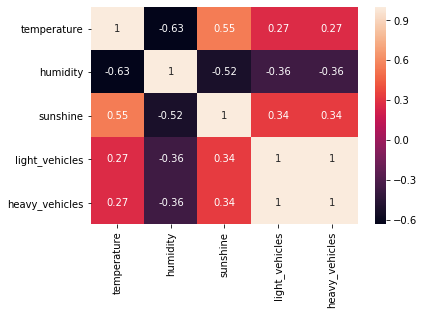

In [16]:
# Import required modules
import seaborn as sns 
import matplotlib.pyplot as plt


sns.heatmap(environ_traffic_resampled.corr(), annot = True)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


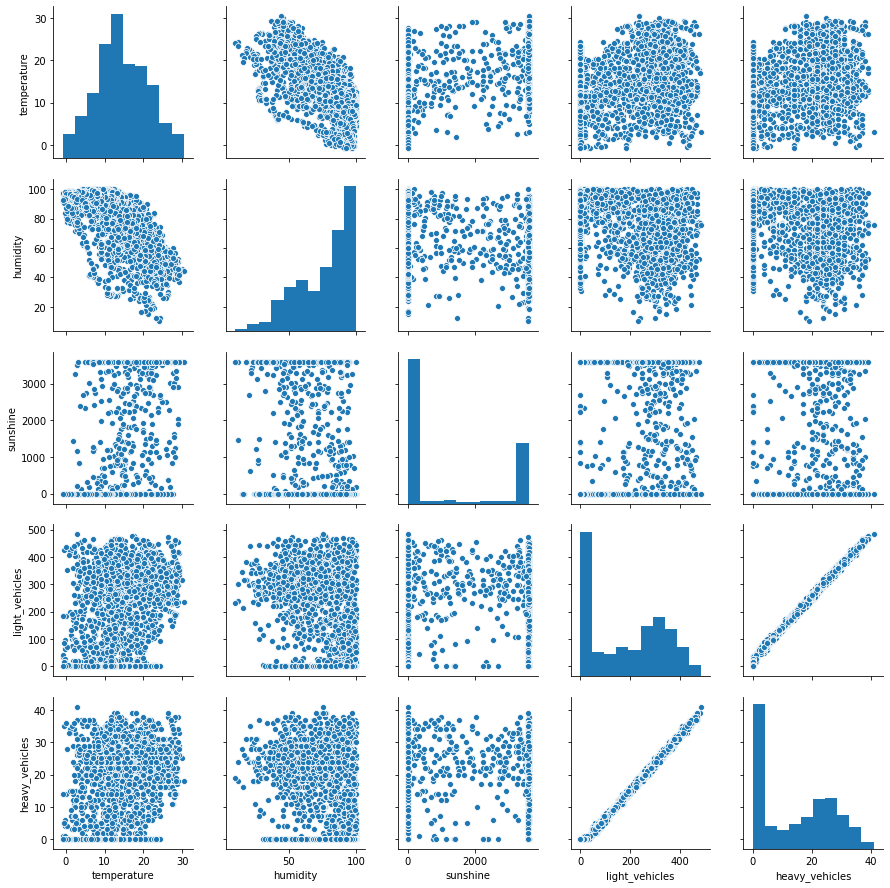

In [18]:
# Create a pairplot
sns.pairplot(environ_traffic_resampled)

# Show plot
plt.show()

flow-rate and water-level are almost highly correlated.
water_temp is close to normally distributed.
water-level is above 50cm more often than not.
All of the above.

### Outlier
Reasons why outliers appear in Datasets:
Measurement error
Manipulation
Extreme Events

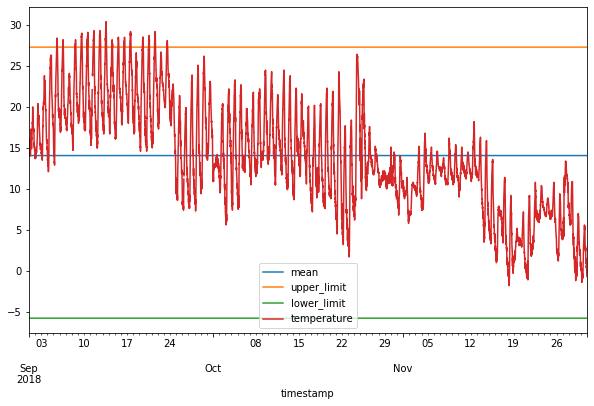

In [40]:
data = environment_df
# Calculate mean
data["mean"] = data['temperature'].mean()

# Calculate upper and lower limits
data["upper_limit"] = data['mean'] + (2 * data['temperature'].std())
data["lower_limit"] = data['mean'] - (3 * data['temperature'].std())

# # Plot the dataframe
data[['mean', 'upper_limit', 'lower_limit','temperature']].plot(figsize = (10,6))

plt.show()

In [0]:
traffic = pd.DataFrame()
traffic['vehicles'] = traffic_light_vehicles_df['light_vehicles']+traffic_heavy_vehicles_df['heavy_vehicles']

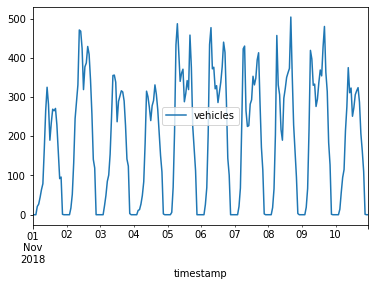

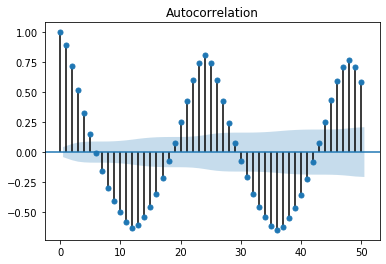

In [44]:
# Plot traffic dataset
traffic["2018-11-01":"2018-11-10"].plot()

# Show plot
plt.show()

# Import tsaplots
from statsmodels.graphics import tsaplots

# Plot autocorrelation
tsaplots.plot_acf(traffic['vehicles'], lags=50)

# Show the plot
plt.show()

Conclusions drawn from the plot:
Possible Answers
- The data has a repeatable pattern every 24 hours.
- Data points separated by 24 hours have a high positive autocorrelation.
- Data points separated by 12 hours have a strong negative autocorrelation.
- All of the above.


Also, The amount of vehicles per hour is very high every 24 hours, or during lunch time - and is very low every 12 hours, or during the night.

### Seasonality and Trends

Time series components
Trend
Seasonal
Residual/ Noise
series[t] = trend[t] + seasonal[t] + residual[t]
20.2 = 14.9 + 4.39 + 0.91

timestamp
2018-09-01 00:00:00   -198.345160
2018-09-01 01:00:00   -198.355114
2018-09-01 02:00:00   -186.274790
2018-09-01 03:00:00   -152.655577
2018-09-01 04:00:00    -83.380114
Freq: H, Name: vehicles, dtype: float64


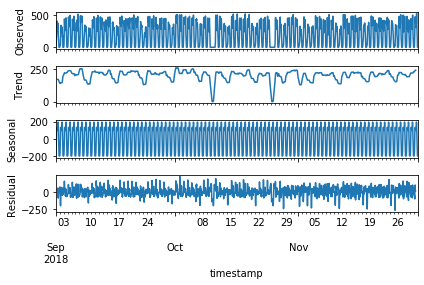

In [45]:
# Import modules
import statsmodels.api as sm

# Perform decompositon 
res = sm.tsa.seasonal_decompose(traffic["vehicles"])

# Print the seasonal component
print(res.seasonal.head())

# Plot the result
res.plot()

# Show the plot
plt.show()

The data shows a clear seasonality, which confirms our findings from the autocorrelation plot. The data also has no clear, continuous trend.

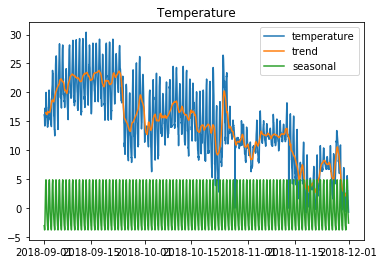

In [51]:
# Resample dataframe to 1h
df_seas = environment_df.fillna(0).resample('1h').max()

# Run seasonal decompose
decomp = sm.tsa.seasonal_decompose(df_seas)

# Plot the timeseries
plt.title("Temperature")
plt.plot(df_seas["temperature"], label="temperature")

# Plot trend and seasonality
plt.plot(decomp.trend["temperature"], label="trend")
plt.plot(decomp.seasonal["temperature"], label="seasonal")
plt.legend()
plt.show()

As expected, the temperature drops during the night. However there is a clearly visible trend to being colder towards the end of the analyzed period